In [ ]:
# install verdict
!uv pip install verdict --system

# This notebook has been run ahead of time, so you can inspect outputs without making
# any API calls. You can set your API key if you want to run the examples yourself.
# %env OPENAI_API_KEY=*************************

## `CoTUnit` (Chain-of-Thought) Usage

Generating a CoT is generally achieved by encouraging the model to show its reasoning via prompting, forcing an explanation via structured output + rejection sampling, and other methods. Sometimes you may want to add some inductive knowledge to your reasoning structure, such as generating evaluation steps using a second, possibly more capable model. The following prompt is adapted from [*G-Eval: NLG Evaluation using GPT-4 with Better Human Alignment* (Liu, et. al)](https://arxiv.org/abs/2303.16634).

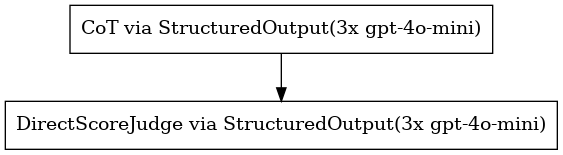

In [15]:
from verdict.common.cot import CoTUnit
from verdict.common.judge import JudgeUnit
from verdict.scale import DiscreteScale

g_eval = CoTUnit().prompt(f"""
    Generate evaluation steps for the following task:

    You will be given one summary written for a news article.

    Your task is to rate the summary on one metric.
    
    Please make sure you read and understand

    Evaluation Criteria:
    Coherence (1-5) - the collective quality of all sentences. We align this dimension with the DUC quality question of structure and coherence whereby ”the summary should be well-structured and well-organized. The summary should not just be a heap of related information, but should build from sentence to sentence to a coherent body of information about a topic.

    Evaluation Steps:
""") \
>> JudgeUnit(DiscreteScale((1, 5))).prompt(f"""
    ...

    Evaluation Steps:
    {{previous.thinking}}

    ...
""")

g_eval.plot()

Note that the `CoTUnit` returns a single string named `thinking`.